In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv("LinearRegressionData.csv")

In [10]:
data.head()
# d.shape()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


<AxesSubplot:>

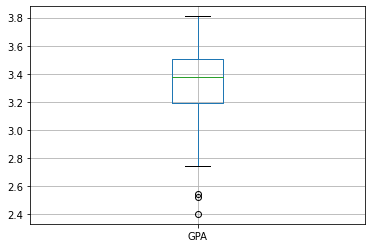

In [43]:
data.boxplot(column=['GPA'])

In [44]:
import numpy as np
import scipy.stats as stats

# Selected Interquartile range method for outlier removal as it performed better than z score method.

#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(81, 2)

<AxesSubplot:>

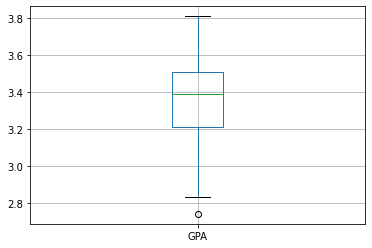

In [45]:
data_clean.boxplot(column=['GPA'])

In [46]:
df_x=data_clean.iloc[:,[0]]
df_y=data_clean.iloc[:,[1]]
df_x

,SAT
3,1685
4,1693
5,1670
6,1764
7,1764
...,...
79,1936
80,1810
81,1987
82,1962


Normalizing the dataset using preprocessing from sklearn

In [48]:
from sklearn import preprocessing
x_array = np.array([data_clean['SAT']])
y_array = np.array([data_clean['GPA']])
d_x = preprocessing.normalize(x_array)
d_y = preprocessing.normalize(y_array)

print(len(d_x), len(d_y[0]))
d_x = d_x[0]
d_y = d_y[0]
print(len(d_x), d_y)

1 81
81 [0.09037628 0.09334485 0.09598357 0.09895214 0.09895214 0.09928198
 0.09928198 0.09961182 0.10126102 0.10159086 0.10159086 0.10291022
 0.10455942 0.10455942 0.10455942 0.10455942 0.10521911 0.10521911
 0.10521911 0.10554895 0.10587879 0.10686831 0.10818767 0.10818767
 0.10818767 0.10818767 0.10818767 0.10818767 0.10818767 0.10851751
 0.10851751 0.10851751 0.10917719 0.10950703 0.11016671 0.11115623
 0.11115623 0.11115623 0.11148607 0.11148607 0.11181591 0.11181591
 0.11214575 0.11214575 0.11214575 0.1124756  0.1124756  0.1124756
 0.11280544 0.11280544 0.11280544 0.11346512 0.11445464 0.11445464
 0.11445464 0.11445464 0.11478448 0.11511432 0.11511432 0.11544416
 0.115774   0.115774   0.11610384 0.11610384 0.11676352 0.11808288
 0.11808288 0.11841272 0.11841272 0.11874256 0.11874256 0.1190724
 0.11940225 0.12006193 0.12039177 0.12237081 0.12237081 0.12237081
 0.12303049 0.12402001 0.12566921]


In [49]:
x=df_x.iloc[:,0]
x=pd.to_numeric(x)

y=df_y.iloc[:,0]
y = pd.to_numeric(y)
len(x)


81

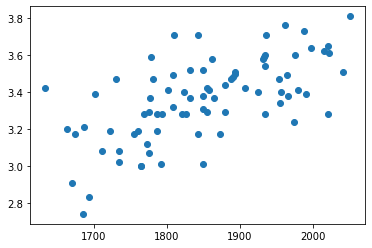

In [50]:
plt.scatter(x,y)

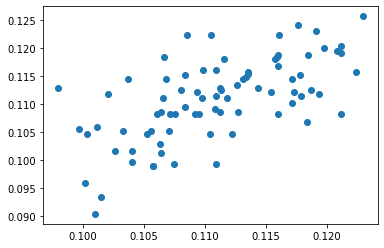

In [51]:
plt.scatter(d_x,d_y)

Length of result list is  1000
[0.0061728395061728366, 1.9726134683771123e-06, 1.774004134795972e-05]
[0.006170848415740447, 3.944908142649306e-06, 3.5477209274096966e-05]
[0.006168857970247071, 5.916884074451454e-06, 5.321150424381805e-05]
[0.006166868169483813, 7.888541315410065e-06, 7.094292672245387e-05]
[0.006164879013241836, 9.859879917143288e-06, 8.867147717526e-05]
[0.006162890501312372, 1.1830899931260914e-05, 0.00010639715606741663]
[0.006160902633486718, 1.3801601409364365e-05, 0.00012411996386402859]
[0.006158915409556242, 1.577198440304672e-05, 0.0001418399010301254]
[0.006156928829312377, 1.7742048963892688e-05, 0.00015955696803066126]
[0.006154942892546627, 1.971179514347863e-05, 0.00017727116533051507]
[0.006152957599050562, 2.1681222993372548e-05, 0.0001949824933944904]
[0.0061509729486158154, 2.3650332565134098e-05, 0.00021269095268731554]
[0.006148988941034096, 2.5619123910314582e-05, 0.00023039654367364355]
[0.00614700557609717, 2.758759708045695e-05, 0.000248099266

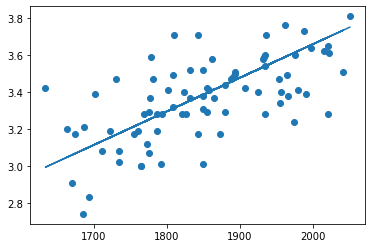

In [66]:
import random
def gradient_descent(x,y):
    result = []
    m = 0 
    c = 0
    alpha = 0.00016
    iterations = 1000

    for j in range(iterations):
        
        Total_J = 0
        d_m = 0 # accumulate total gradient in m
        d_c = 0 # accumulate total gradient in c

        for row in range(len(x)): # looping over number of training examples

            # hypothesis function
            hx = m*x[row]+c
            
            # cost function 
            J = ( (hx-y[row])**2 )
            Total_J = Total_J + J

            d_c = d_c + (hx - y[row])
            d_m = d_m + x[row]*(hx - y[row])
        
        Total_J = Total_J/(2*len(x))
        # update m and c 
        temp0 = c - alpha * (d_c/(len(x)))
        temp1 = m - alpha * (d_m/(len(x)))
        c = temp0
        m = temp1
        result.append([Total_J,m,c])

    print('Length of result list is ',len(result))
    for i in result:
        print(i)
    return min(result, key=lambda x: x[0])

    # return [m,c]

X = np.array([i for i in range(11)])
Y = np.array([2*i+random.randint(-2, 3) for i in range(11)])

ans = gradient_descent(d_x,d_y)
print(ans)
plt.scatter(x,y)
Y2 = ans[1]*x+ans[2]
plt.plot(x,Y2)
# print(d_x,d_y)

C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.8312534713798102


C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


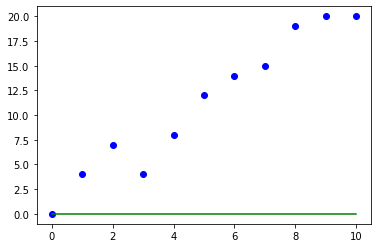

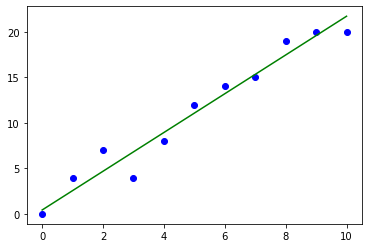

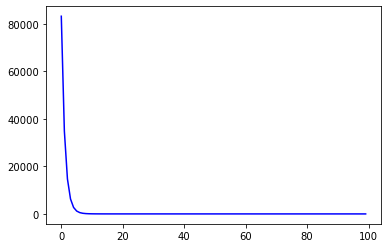

In [30]:
# Implementation of gradient descent in linear regression
# This code borrowed from https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		# print("Parameter values ",b)
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	for i in range(1,len(Y)):
		Y[i] = Y[i] + random.randint(-2, 3)

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while iterations<1000:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()
